In [1]:
%run init_notebook.py

In [2]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import os

from settings import DATA_DIR, weights, ticker_etfc, ticker_trade, ticker_etfr, dict_url_base, inflows_etfc
from src.classes import AllocationEval, DataPull, Eval, Portfolio
from utils.utils import apply_datetime_format

In [12]:
list_time = []
for item in range(0, 24):
    list_time.append(item * 30)

<ipython-input-14-2f29ef5bb729>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 5))


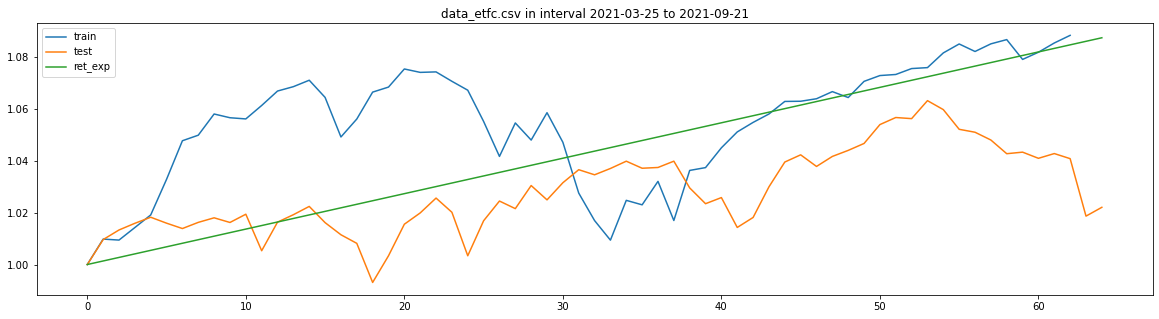

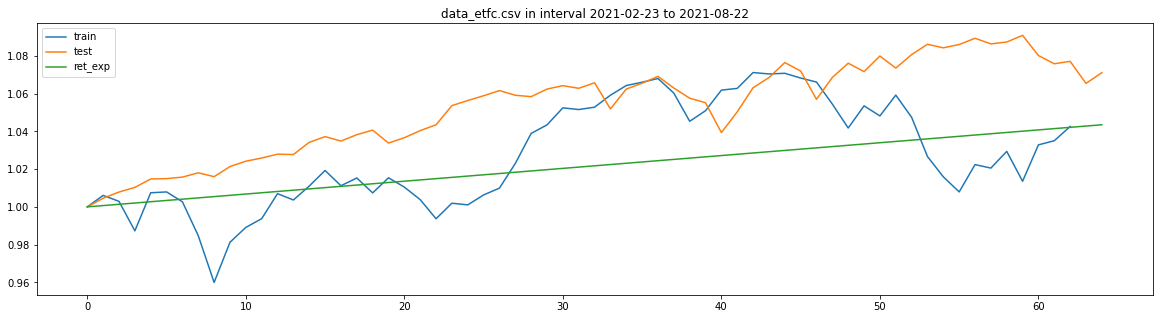

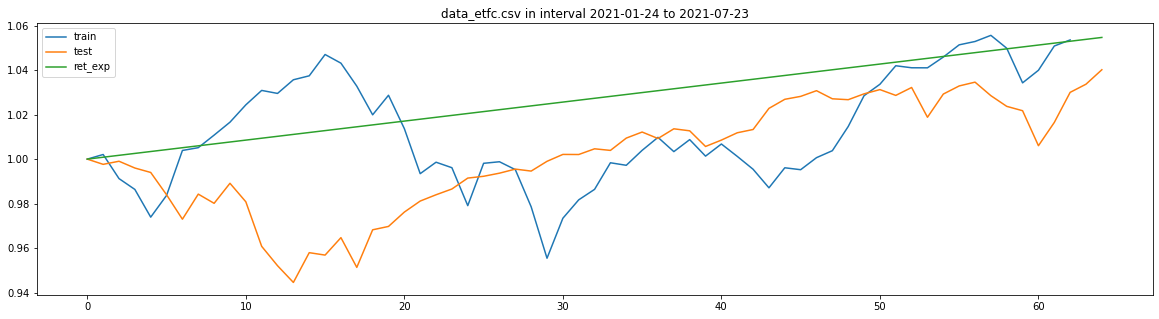

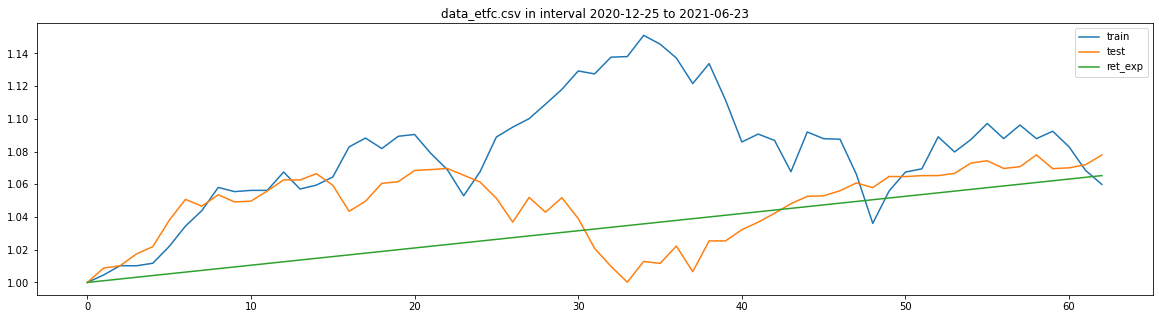

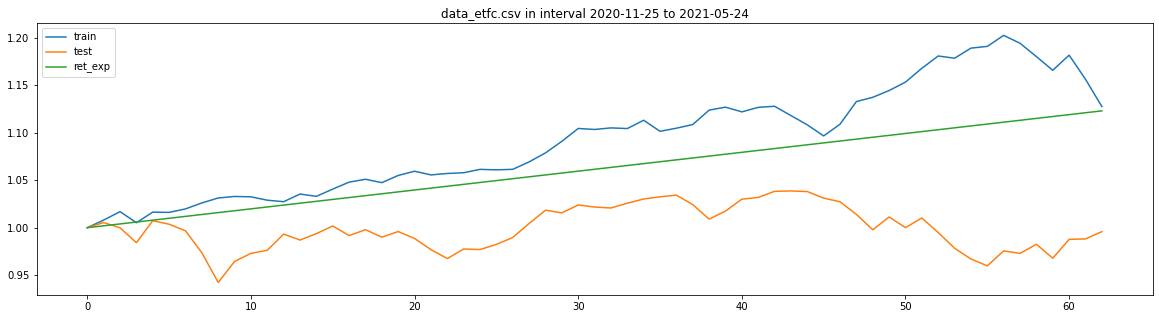

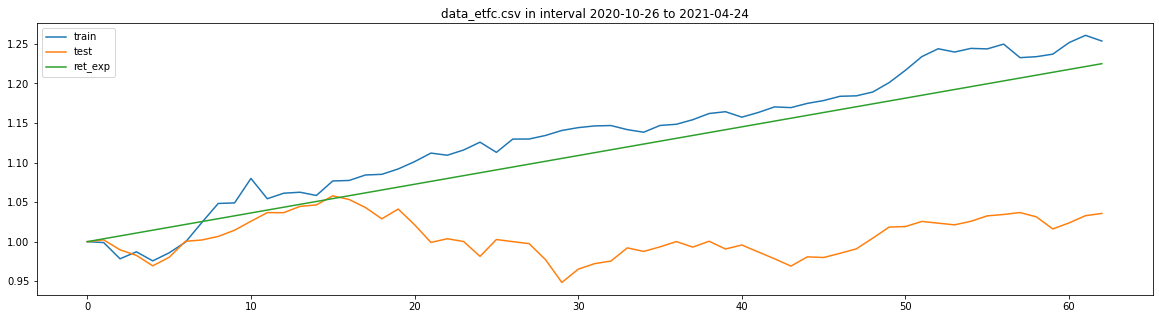

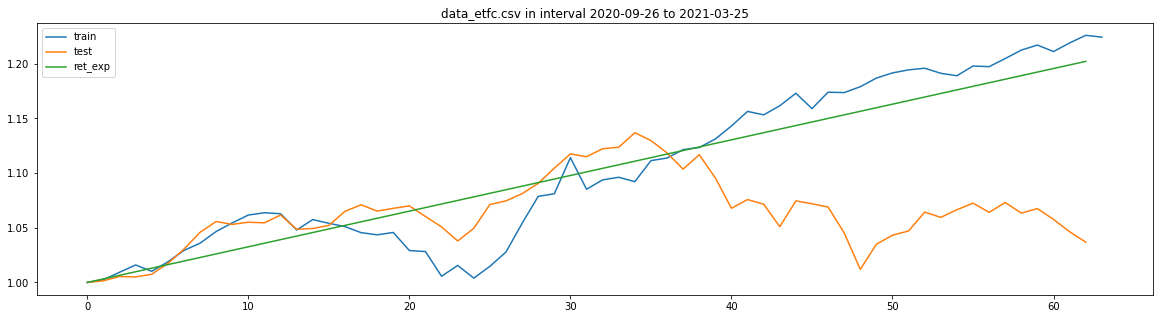

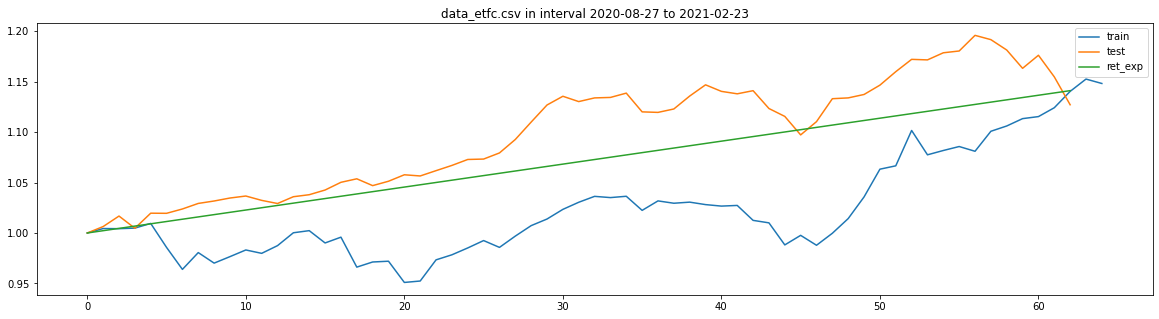

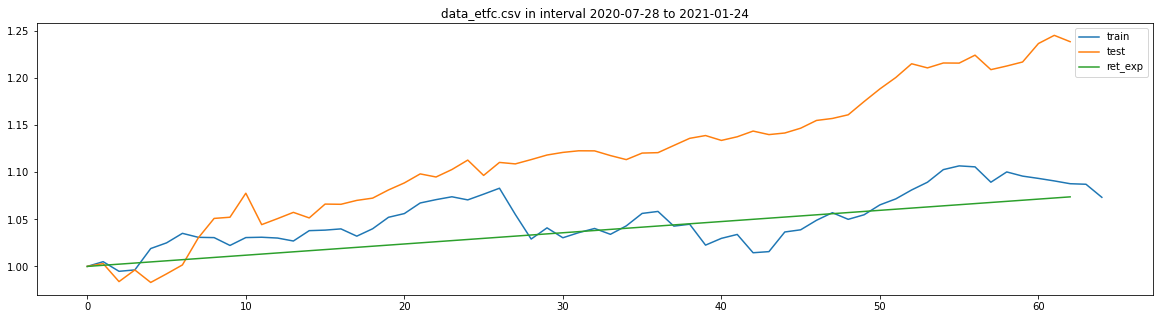

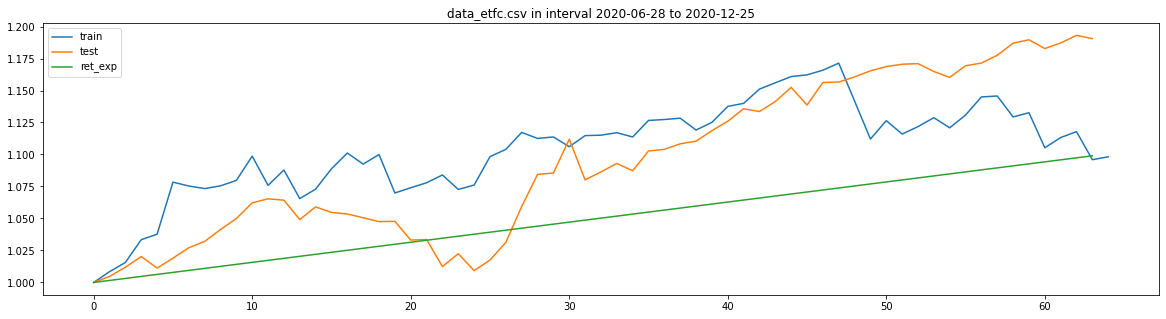

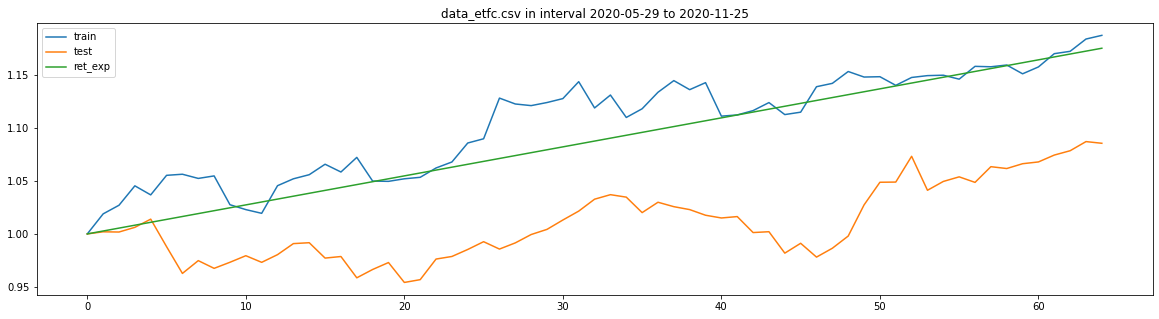

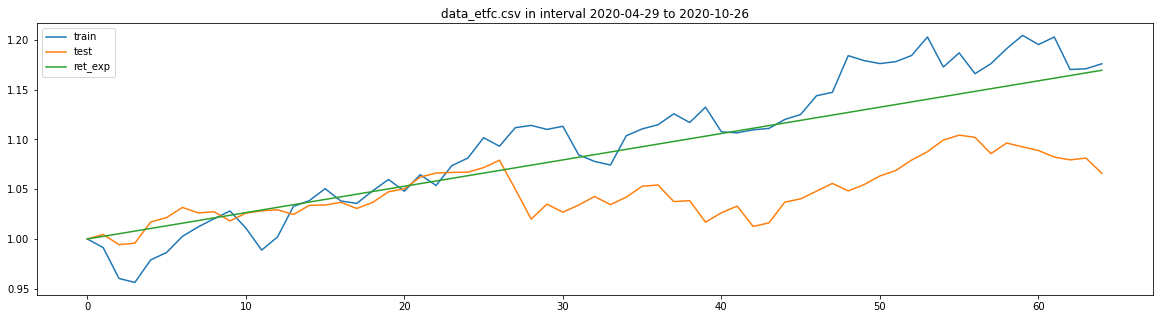

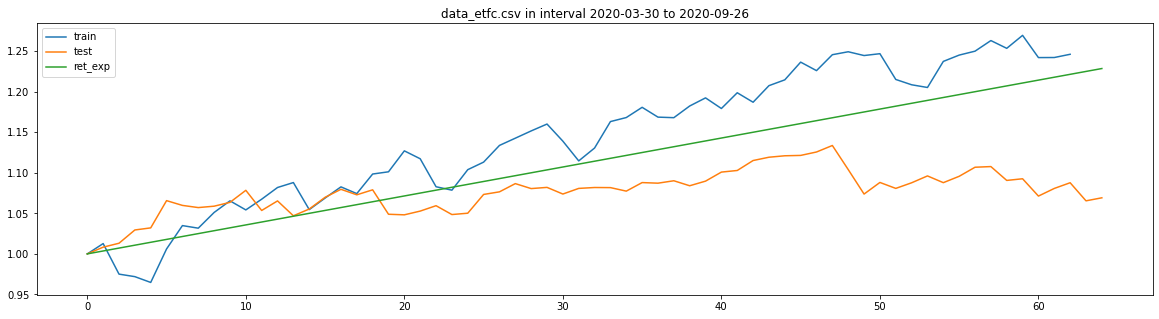

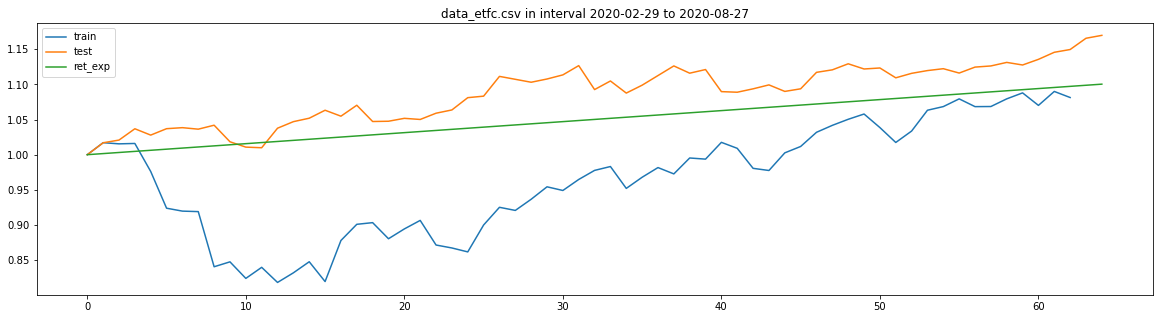

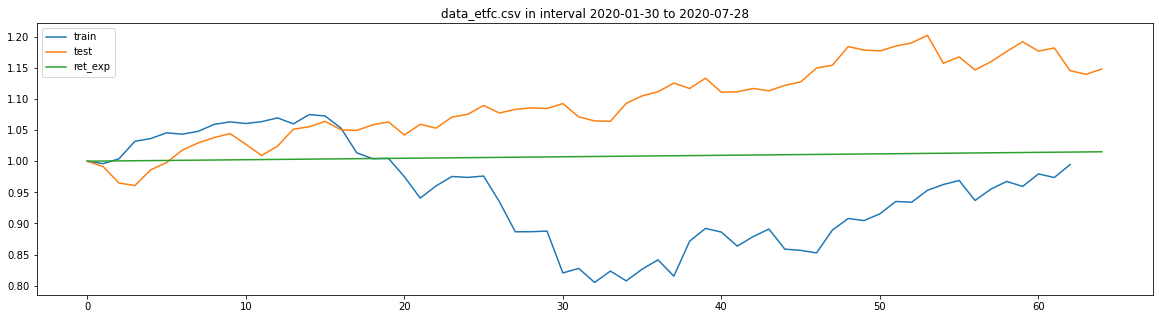

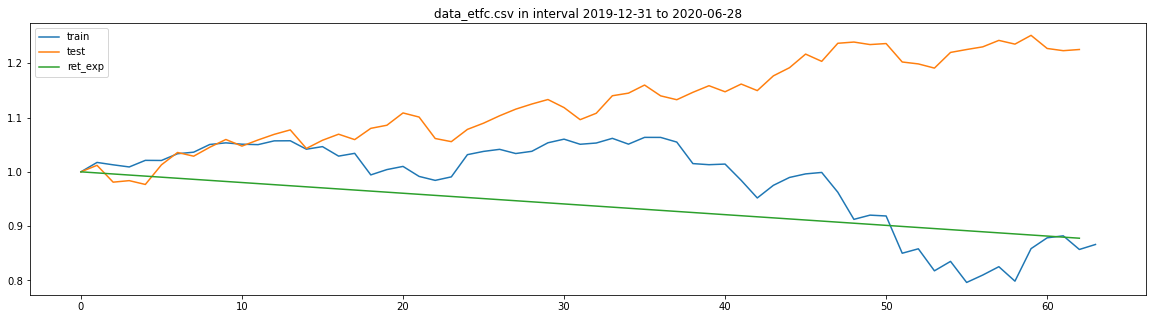

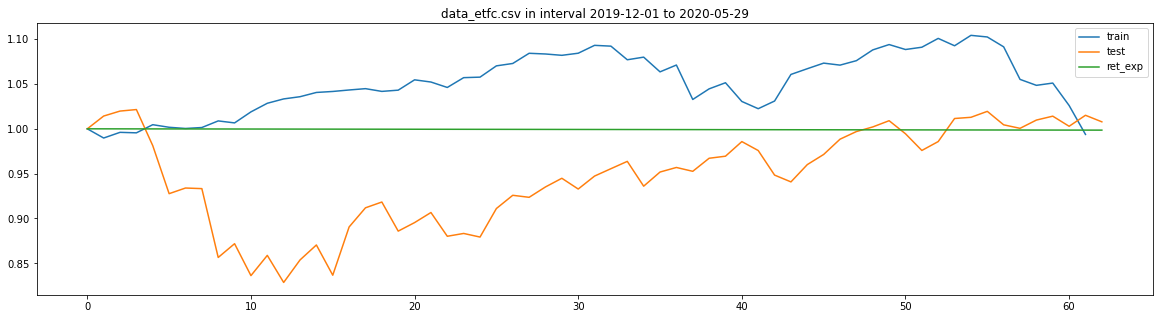

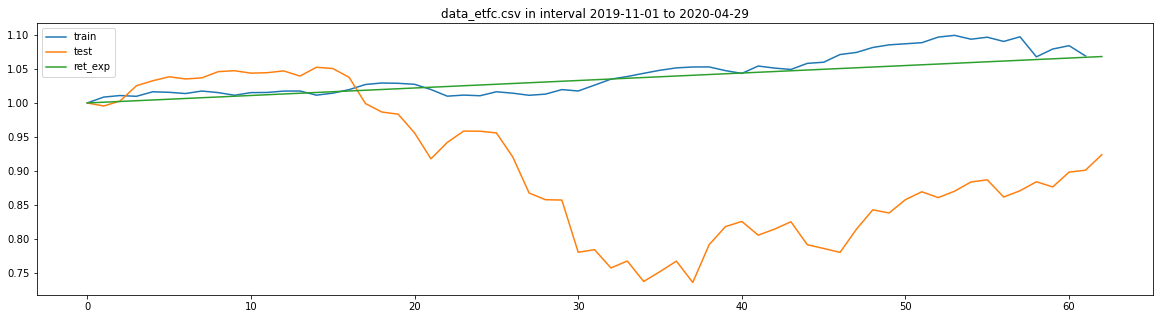

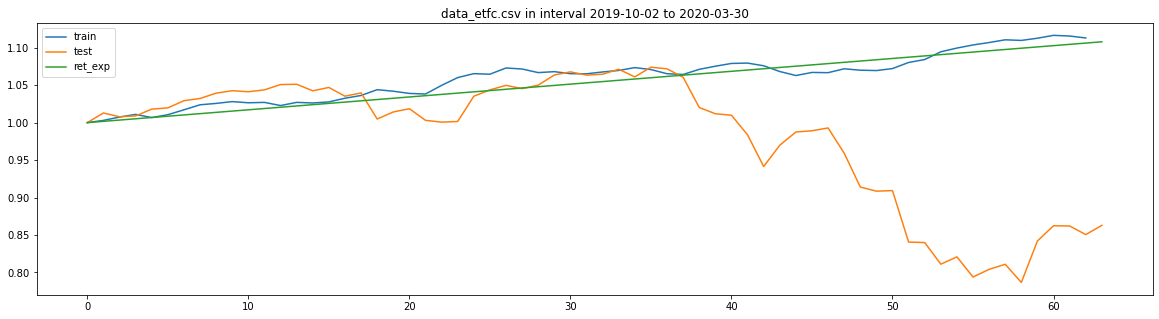

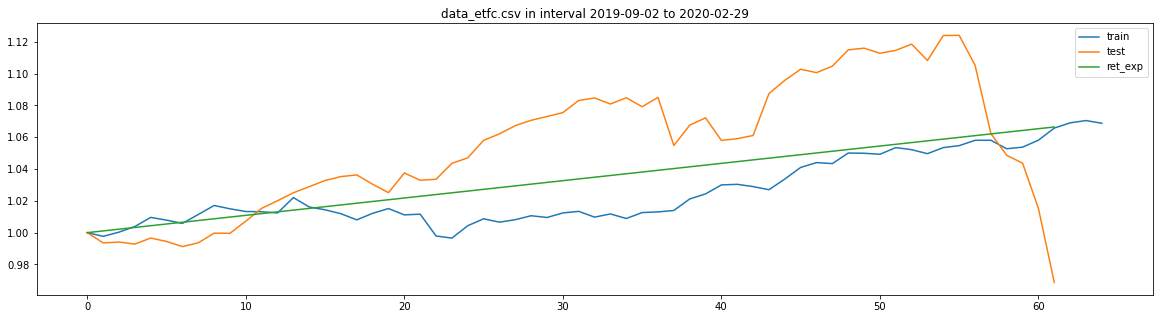

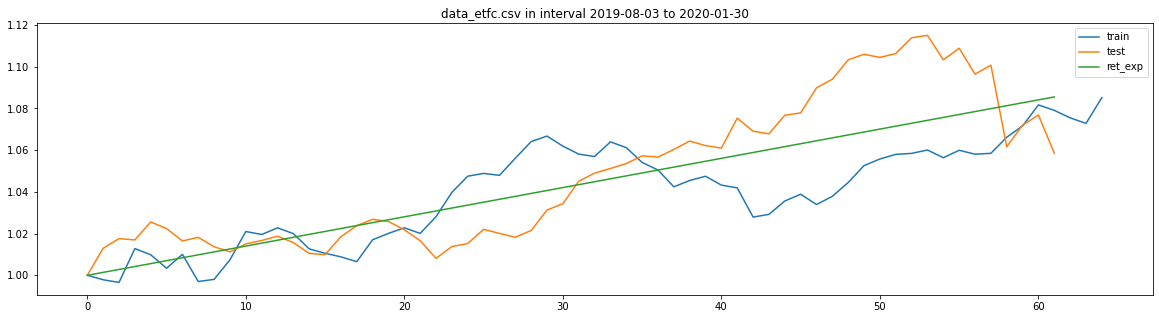

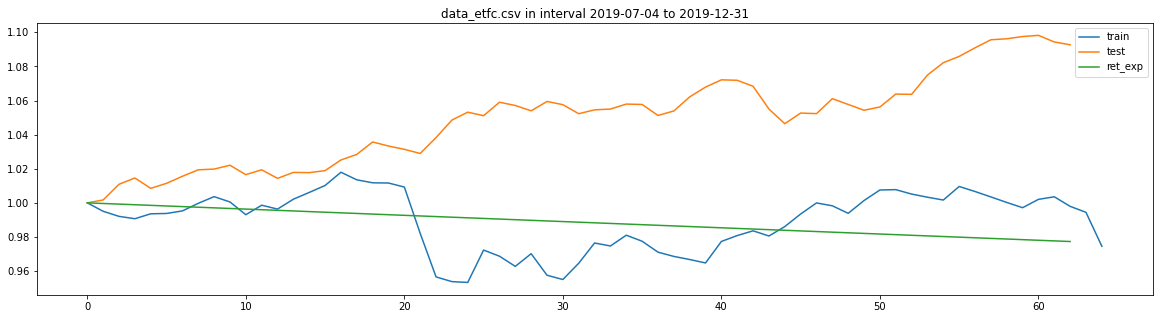

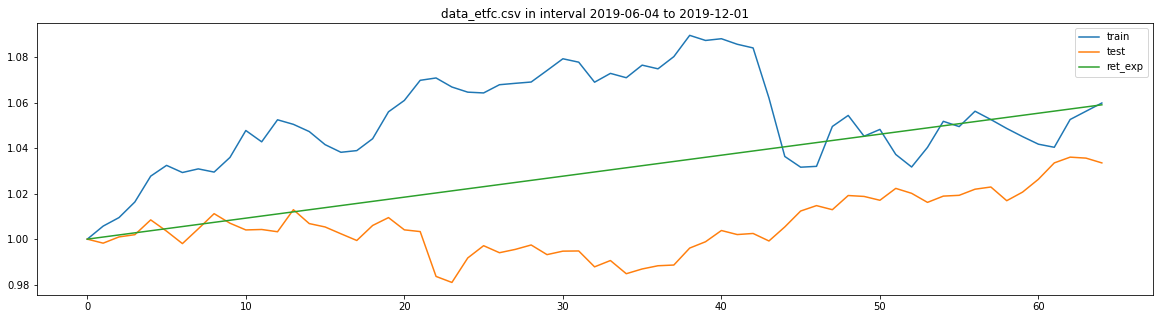

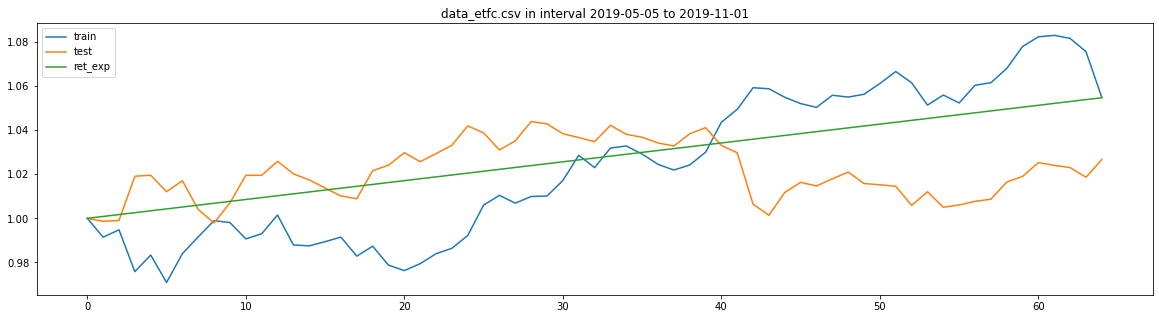

In [14]:
list_test_ret = []
list_test_err = []

port = Portfolio(ticker=ticker_etfc, filename="data_etfc.csv", weights=weights, inflows=inflows_etfc)

for i, item in enumerate(list_time):
    
    z = Eval(portfolio=port, time_lag=item, time_window_test=3, time_window_train=3)

    fig, ax = plt.subplots(figsize=(20, 5))
    
    ax.plot(z.data_train_ind.sum(axis=1).values)
    ax.plot(z.data_test_ind.sum(axis=1).values)
    ax.plot(np.linspace(1, (1 + z.expected_alloc_return * z.mid_end_date_delta_test), len(z.data_test)))
    
    plt.legend(["train", "test", "ret_exp"])        
    plt.title(f"{port.filename} in interval {z.start_date} to {z.end_date}")
    
    list_test_ret.append(z.data_test_ind.sum(axis=1).iloc[-1] - 1)
    list_test_err.append(z.error)

In [15]:
# train 3 test 3
print(sum(list_test_err) / len(list_test_err))
print((np.array(list_test_ret) / 3).sum() / len(list_test_ret) * 12)

0.00014512703187614042
0.2624032555149759


In [18]:
# train 5 test 5
print(sum(list_test_err) / len(list_test_err))
print((np.array(list_test_ret) / 5).sum() / len(list_test_ret) * 12)

0.00021826897651852447
0.24463808219040056


In [15]:
# train 4 test 4
print(sum(list_test_err) / len(list_test_err))
print((np.array(list_test_ret) / 4).sum() / len(list_test_ret) * 12)

0.0001674438890281232
0.2704409730401925


In [9]:
# train 2 test 2
print(sum(list_test_err) / len(list_test_err))
print((np.array(list_test_ret) / 2).sum() / len(list_test_ret) * 12)

0.0003835519184221949
0.23778849096570398


In [5]:
# train 3 test 3
print(sum(list_test_err) / len(list_test_err))
print((np.array(list_test_ret) / 3).sum() / len(list_test_ret) * 12)

0.00019807348869762206
0.27426438385645874


In [7]:
# train 3 test 10
print(sum(list_test_err) / len(list_test_err))
print((np.array(list_test_ret) / 10).sum() / len(list_test_ret) * 12)

-0.0005291975630926356
0.254881371096116


In [34]:
(dt.datetime.now().date() - dt.date(year=2019, month=10, day=1)) / 30

datetime.timedelta(days=23, seconds=17280)

In [22]:
sum(list_6month) / len(list_6month)

0.00016123127394400993

In [14]:
# error train 3 test 3
sum(list_6month) / len(list_6month)

0.0007824819261120835

In [11]:
# error train 3 test 2
sum(list_6month) / len(list_6month)

0.0007721117454947392

In [9]:
# error train 2 test 2
sum(list_6month) / len(list_6month)

0.00031171840939603037

In [127]:
def get_abc_list(arr):
    
    arr_len = len(arr)
    
    output = list(string.ascii_lowercase)
    
    output = output[:arr_len]
    
    i = 2
    while len(output) < arr_len:
        output.extend([f"{item * i}" for item in list(string.ascii_lowercase)])
        i = i + 1
    
    return output[:arr_len]

In [29]:
%%capture
list1 = []

for item in list_weeeks:
    x_month = 6
    x0_month_past = (dt.datetime.now() - dt.timedelta(item)).date()
    x1_month_past = ((dt.datetime.now() - dt.timedelta(item)) - dt.timedelta(30 * (x_month) / 2)).date()
    x2_month_past = ((dt.datetime.now() - dt.timedelta(item)) - dt.timedelta(30 * x_month)).date()

    data = DataPull(ticker=ticker_etfc,
                         request_data_name="Time Series (Daily)",
                         file_name='data_etfc.csv').run().reset_index()
    data["Date"] = data.Date.apply(lambda x: apply_datetime_format(x))
    data.set_index("Date", inplace=True)
    
    
    x1 = data[x2_month_past : x1_month_past].copy()
    x2 = data[x1_month_past : x0_month_past].copy()
    
    data = AllocationEval(x1, 
                          weights=weights,
                          return_period="D").run()
    
    sugg_weight = dict(zip(data.sort_values("Sharp_ratio").iloc[-1][list(ticker_etfc.values())].index,
                       data.sort_values("Sharp_ratio").iloc[-1][list(ticker_etfc.values())].values))
    
    ret = (x2.resample("D").last().pct_change().mean() * list(sugg_weight.values())).sum()
    
    list1.append([x0_month_past, x1_month_past, x2_month_past, ret, sugg_weight])